# EPW Dispersion and Grid Instability
-----------------------------------------------------------




 
### FST for 2019 HED Summer School
-----------------------------------------

#### Version History:

Version 1.0:  July 12th, 2019


###   

### First things first, let's run the cell below to load the libraries and set up the plotting defaults...

###   

###   

In [8]:
# temporary placeholder for some helper functions.  They will go into their own files when this notebook is finished
#
#

def energy_history(dirname='landau-kd035',dt=1.0):
    filename=dirname+'/energies.0'
    f=open(filename,'r')
    lines=f.readlines()
    result=[ ]
    for x in lines:
        result.append(float(x.split()[6]))
    f.close()
    ref=result[0]
    i=0
    while i < len(result):
        result[i]=abs(result[i]-ref)/ref*100.0
        i+=1
    return result

def grid_instability_deck_maker(iname='thermal-plasma-nosmoothing.txt', oname='case1.txt', vth=0.1, 
             ax=1.0):

    with open(iname) as osdata:
        data = osdata.readlines()

    for i in range(len(data)):
        if 'VTX' in data[i]:
            data[i] = ' VTX = '+str(vth)+',\n'
        if 'AX = 0.0' in data[i]:
            data[i] = ' AX = '+str(ax)+',\n'


    with open(oname,'w') as f:
        for line in data:
            f.write(line)
    
    print('New file '+oname+' is written.')
    dirname = oname.strip('.txt')
    print('Running OSIRIS in directory '+dirname+'...')
    osiris.run_upic_es(rundir=dirname,inputfile=oname)
    outdirname=oname.split(".")[0]
    print(outdirname)
    e_history=energy_history(dirname=outdirname)
    taxis=np.arange(len(e_history))*0.2
    plt.plot(taxis,e_history)
    plt.title('Energy Deviation vs Time (in %)')
    plt.xlabel('Time ($\omega_p^{-1}$)')   
    plt.show()
 
    osiris.plot_wk_arb(rundir=outdirname,field='Ex',TITLE='EPW dispersion curve',klim=3,wlim=2,plot_show=False)
    kaxis=np.arange(0,3.0,0.05)
    bohm=1.0+3.0*kaxis*kaxis*vth*vth
    plt.plot(kaxis,bohm)
    plt.show()
#    plot_maxgamma_t(dirname)
    print('Done')

def grid_instability_widget():
    style = {'description_width': '350px'}
    layout = Layout(width='55%')

    a = widgets.Text(value='thermal-plasma-nosmoothing.txt', description='Template Input File:',style=style,layout=layout)
    b = widgets.Text(value='case1.txt', description='New Output File:',style=style,layout=layout)
    c = widgets.BoundedFloatText(value=0.1, min=0.0, max=1.0, description='Thermal Velocity:',style=style,layout=layout)
    d = widgets.FloatText(value=1.0,description='AX or the smoothing factor:',style=style,layout=layout)
    im = interact_calc(grid_instability_deck_maker, iname=a,oname=b,vth=c,ax=d);
    im.widget.manual_button.layout.width='250px'
    
def energy_history(dirname='landau-kd035',dt=1.0):
    filename=dirname+'/energies.0'
    f=open(filename,'r')
    lines=f.readlines()
    result=[ ]
    for x in lines:
        result.append(float(x.split()[6]))
    f.close()
    ref=result[0]
    i=0
    while i < len(result):
        result[i]=abs(result[i]-ref)/ref*100.0
        i+=1
    return result


In [4]:
## Here we load the library

import osiris
#import landau-helper
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mpmath import *


## for widgets
import glob
from ipywidgets import interact_manual,fixed,Layout,interact, FloatSlider
##

import ipywidgets as widgets
interact_calc=interact_manual.options(manual_name="Make New Input and Run")
import os

plt.rc('font',size=20,family="serif")
%matplotlib inline

SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 32 


## Grid Instability and Numerical Dispersion:

This is the first workshop exercise using a real particle-in-cell code (UPIC, a 1D electrostatic code that has a long history).  



The normalization for UPIC are as follows.  Note that $\Delta$ is the size of the cell:

 

* Time:  $t' = t \omega_{pe}$

* Frequency: $\omega' = \frac{\omega}{\omega_{p}}$ 

* Position: $\vec{x}' = \frac{\omega_{p}}{c} \vec{x}/\Delta$  

* Velocity: $\vec{v}' = \frac{\vec{v}}{\omega_p \Delta} $  

* Electric field: $\vec{E}' = \frac{e}{m_e} \frac{1}{\omega_p^2 \Delta} \vec{E}$  

* (There is no magnetic field as the code is purely electrostatic)

In the absence of ion motion and external magnetic fields, the only wave allowed in UPIC is the electron plasma wave.  The first notebook is to look at the role numerics play on the property of electron plasma waves.  In this notebook, we will look at the behavior of electron plasma waves for various electron temperatures, we will see whether 
or not the system conserves total energy (it is a closed system, so it should conserve energy in theory) and what happens to the numerical dispersion relation when you add some smoothing to the grid quantities.


So, first thing we want to look at is the energy conservation properties of a electrostatic PIC code.  It is known that for systems with very cold plasmas (cold in this case means that the Debye length is much less than the length of the grid), the code will gain energy due to numerical reasons and it will continue to gain energy until the Debye length is comparable to the grid size.  This was investigated by Langdon and coworkers in the 1960's.  The reason for this numerical heating is due to grid aliasing, which can be suppressed by digital filtering.  However, filtering introduces additional complications which we will look at in this notebook


####  In the cell below we look at the overall time history of the electrostatic potential, you can see the mode driven at k=.319.

In [ ]:
## Running UPIC with a thermal plasma, normalization, grid instability and numerical dispersion relations

In [10]:
dirname = 'thermal-plasma-nosmoothing'
osiris.run_upic_es(rundir=dirname,inputfile='thermal-plasma-nosmoothing.txt')

run_upic_es completed normally


In [1]:

test=energy_history(dirname='thermal-plasma-nosmoothing')
taxis=np.arange(1000)*0.2
plt.plot(taxis,test)
plt.title('Energy Deviation vs Time (in %)')
plt.xlabel('Time ($\omega_p^{-1}$)')

NameError: name 'energy_history' is not defined

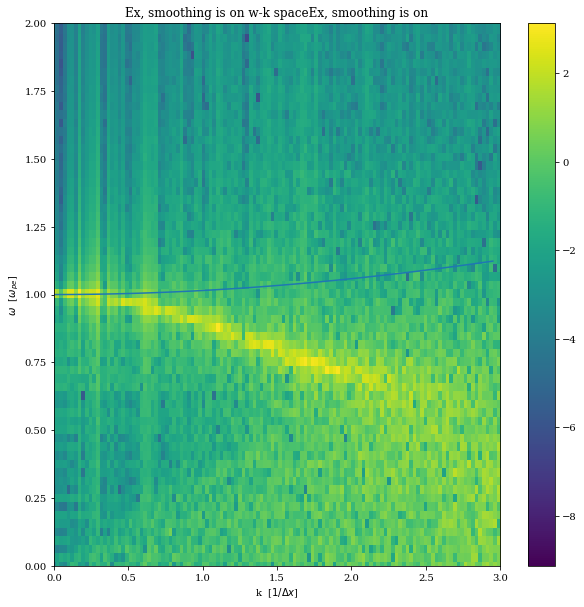

In [21]:
osiris.plot_wk_arb(rundir='thermal-plasma-nosmoothing',field='Ex',TITLE='Ex, smoothing is on',klim=3,wlim=2,
                   plot_show=False)
kaxis=np.arange(0,3.0,0.05)
bohm=np.sqrt(1.0+3.0*kaxis*kaxis*0.01)
plt.plot(kaxis,bohm)
plt.show()

In [13]:
dirname = 'thermal-plasma-smoothing'
osiris.run_upic_es(rundir=dirname,inputfile='thermal-plasma-smoothing.txt')

run_upic_es completed normally


In [11]:
test2=energy_history(dirname='thermal-plasma-smoothing')
taxis=np.arange(1000)*0.2
plt.plot(taxis,test2)
plt.title('Energy Deviation vs Time (in %)')
plt.xlabel('Time ($\omega_p^{-1}$)')

FileNotFoundError: [Errno 2] No such file or directory: 'thermal-plasma-smoothing/energies.0'

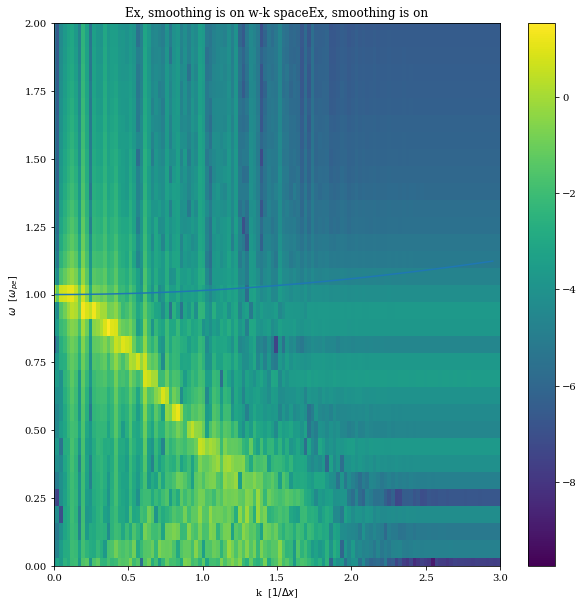

In [20]:
osiris.plot_wk_arb(rundir='thermal-plasma-smoothing',field='Ex',TITLE='Ex, smoothing is on',klim=3,wlim=2,
                   plot_show=False)
kaxis=np.arange(0,3.0,0.05)
bohm=np.sqrt(1.0+3.0*kaxis*kaxis*0.01)
plt.plot(kaxis,bohm)
plt.show()

Now that you see that at vth=0.1 $dx \omega_{pe}$, both simulations performed very poorly,  i.e., either the energy conservation is poor with no smoothing, or that the numerical dispersion is poor with smoothing turned on.   Hopefully this demo did not turn you off from running PIC simulations, but rather it give you a behind-the-curtain glimpse into the pitfalls of performing a PIC simulation.  Here we will show you an example where we achieve good energy conservation ( > 0.01% over 2000 steps) and also good numerical dispersions.

In [16]:
dirname = 'thermal-plasma-nosmoothing-vt05'
osiris.run_upic_es(rundir=dirname,inputfile='thermal-plasma-nosmoothing-vt05.txt')

run_upic_es completed normally


Text(0.5, 0, 'Time ($\\omega_p^{-1}$)')

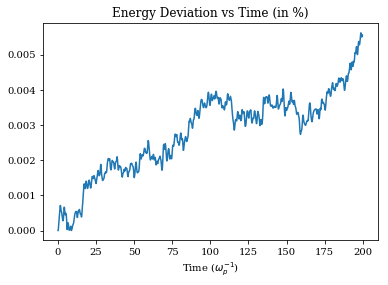

In [16]:
test2=energy_history(dirname='thermal-plasma-nosmoothing-vt05')
taxis=np.arange(1000)*0.2
plt.plot(taxis,test2)
plt.title('Energy Deviation vs Time (in %)')
plt.xlabel('Time ($\omega_p^{-1}$)')

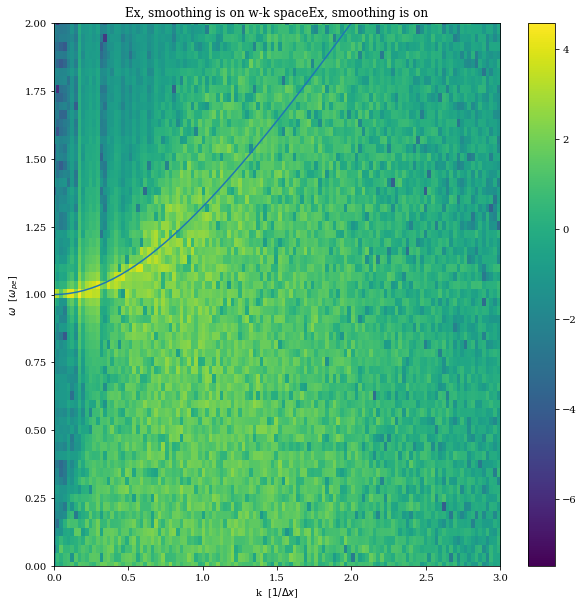

In [19]:
osiris.plot_wk_arb(rundir='thermal-plasma-nosmoothing-vt05',field='Ex',TITLE='Ex, smoothing is on',klim=3,wlim=2,plot_show=False)

kaxis=np.arange(0,3.0,0.05)
bohm=np.sqrt(1.0+3.0*kaxis*kaxis*0.25)
plt.plot(kaxis,bohm)
plt.show()



## Sandbox:
----------------

So, from the examples above, you can see energy conservation is not necessarily the sole criteria in judging the "correctness" of a simulation.  Below you can change the temperature and the smoothing factor for UPIC, and see how the behavior changes both the energy conservation and the numerical dispersion of EPW's as you make these changes.

In [9]:
grid_instability_widget()


interactive(children=(Text(value='thermal-plasma-nosmoothing.txt', description='Template Input File:', layout=…

In [3]:
import os
cwd = os.getcwd()
print(cwd)

/home/jovyan/work/JupyterPIC/dev/grid-instability
